# Titanic

In [36]:
import numpy as np
from pandas import Series,DataFrame
import pandas as pd

In [32]:
dframe = pd.read_csv('train.csv')
#dframe = pd.read_csv('train.csv',nrows=2)
dframe.head() # display first 5 rows
#dframe = pd.read_table('train.csv',sep=',')
#dframe

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [23]:
import sys

In [24]:
#dframe.to_csv(sys.stdout,sep=',') #output text

In [25]:
import pandas.util.testing as tm; tm.N=3
def unpivot(frame):
    N, K = frame.shape
    
    data = {'value' : frame.values.ravel('F'),
            'variable' : np.asarray(frame.columns).repeat(N),
            'date' : np.tile(np.asarray(frame.index), K)}
    
    # Return the DataFrame
    return DataFrame(data, columns=['date', 'variable', 'value'])

#Set the DataFrame we'll be using
dframe_p = unpivot(tm.makeTimeDataFrame())

dframe_p

,date,variable,value
0,2000-01-03,A,1.048498
1,2000-01-04,A,0.414013
2,2000-01-05,A,1.021371
3,2000-01-03,B,-1.171112
4,2000-01-04,B,0.522192
5,2000-01-05,B,0.317320
6,2000-01-03,C,-0.279378
7,2000-01-04,C,1.246853
8,2000-01-05,C,-0.068586
9,2000-01-03,D,0.541493


In [26]:
dframe_piv = dframe_p.pivot('date','variable','value')

#Show
dframe_piv

variable,A,B,C,D
date,,,,
2000-01-03,1.048498,-1.171112,-0.279378,0.541493
2000-01-04,0.414013,0.522192,1.246853,-1.444818
2000-01-05,1.021371,0.317320,-0.068586,-1.221293


In [69]:
dframe = pd.read_csv('train.csv')
#dframe = pd.read_csv('train.csv',nrows=3)
dframe.head() # display first 5 rows
#dframe = pd.read_table('train.csv',sep=',')
#dframe

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [77]:
dframe_piv = dframe.pivot_table(index=['Survived','Sex'],aggfunc='count',fill_value=0)

#Show
dframe_piv

Age  Cabin  Embarked  Fare  Name  Parch  PassengerId  Pclass  \
Survived Sex                                                                    
0        female   64      6        81    81    81     81           81      81   
         male    360     62       468   468   468    468          468     468   
1        female  197     91       231   233   233    233          233     233   
         male     93     45       109   109   109    109          109     109   

                 SibSp  Ticket  
Survived Sex                    
0        female     81      81  
         male      468     468  
1        female    233     233  
         male      109     109

In [98]:
dframe.sample(n=3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
739,740,0,3,"Nankoff, Mr. Minko",male,NaN,0,0,349218,7.8958,NaN,S
504,505,1,1,"Maioni, Miss. Roberta",female,16.0,0,0,110152,86.5000,B79,S
732,733,0,2,"Knight, Mr. Robert J",male,NaN,0,0,239855,0.0000,NaN,S


In [82]:
dframe.sort_values(by='Age',ascending=False)[:3]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C


In [104]:
df = DataFrame(dframe,columns=["Survived","Pclass","Age"])

In [107]:
df.columns.tolist()

['Survived', 'Pclass', 'Age']

In [85]:
dframe['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [87]:
dframe.groupby(['Age','Sex']) ## don't know

In [96]:
x_train = [[80,1],[74,3],[71,1]]
y_train = [1,0,0]
x_test = [[80,1],[74,3]]
y_test = [1,0]

In [97]:
### how to input data just 2 column / set col as x and y ??
from sklearn import tree
#X = [[0, 0], [1, 1]]
#Y = [0, 1]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)

pred = clf.predict(x_test)
pred
import numpy as np
from sklearn.metrics import accuracy_score
#y_pred = [0, 2, 1, 3]
#y_true = [0, 1, 2, 3]
accuracy_score(pred, y_test)

1.0

In [ ]:
## loop predict model
from sklearn import tree
from sklearn import tree
from sklearn import tree



In [108]:
# Let's begin by importing what we'll need (You'll probably be copying and pasting this a lot)

# The normal imports
import numpy as np
from numpy.random import randn
import pandas as pd

# Import the stats librayr from numpy
from scipy import stats

# These are the plotting modules adn libraries we'll use:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Command so that plots appear in the iPython Notebook
%matplotlib inline

(array([  4.,  11.,  17.,  27.,  21.,  13.,   6.,   0.,   0.,   1.]),
 array([-2.43373048, -1.79553554, -1.15734059, -0.51914565,  0.1190493 ,
         0.75724424,  1.39543919,  2.03363413,  2.67182908,  3.31002402,
         3.94821897]),
 <a list of 10 Patch objects>)

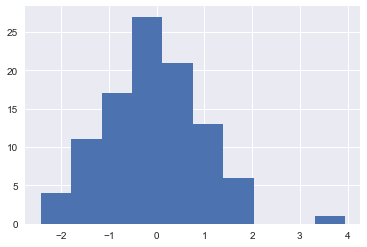

In [109]:
#Create a random normal-dist dataset
dataset1 = randn(100)

#Plot a histogram of the dataset, note bins=10 by default
plt.hist(dataset1)